In [21]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("human4.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

MVK
ETTYYDVLGVKPNATQEELK
K
AYR
K
LALK
YHPDK
NPNEGEK
FK
QISQAYEVLSDAK
K
R
ELYDK
GGEQAIK
EGGAGGGFGSPMDIFDMFFGGGGR
MQR
ER
R
GK
NVVHQLSVTLEDLYNGATR
K
LALQK
NVICDK
CEGR
GGK
K
GAVECCPNCR
GTGMQIR
IHQIGPGMVQQIQSVCMECQGHGER
ISPK
DR
CK
SCNGR
K
IVR
EK
K
ILEVHIDK
GMK
DGQK
ITFHGEGDQEPGLEPGDIIIVLDQK
DHAVFTR
R
GEDLFMCMDIQLVEALCGFQKPISTLDNR
TIVITSHPGQIVK
HGDIK
CVLNEGMPIYR
RPYEK
GR
LIIEFK
VNFPENGFLSPDK
LSLLEK
LLPER
K
EVEETDEMDQVELVDFDPNQER
R
R
HYNGEAYEDDEHHPR
GGVQCQTS


In [22]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("human4.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())


Spectrum 1 of MVK has 5 peaks.
y1-H3N1+ is generated at m/z 130.086255817671
y1+ is generated at m/z 147.112804913371
y2-H3N1+ is generated at m/z 229.15467010477104
b2+ is generated at m/z 231.11617577097098
y2+ is generated at m/z 246.18121920047105
Spectrum 1 of ETTYYDVLGVKPNATQEELK has 100 peaks.
b2-H2O1+ is generated at m/z 84.044390626271
y1-H3N1+ is generated at m/z 130.086255817671
y1+ is generated at m/z 147.112804913371
b3-H2O1+ is generated at m/z 185.09206984957098
b2+ is generated at m/z 231.09754991337098
y2-H3N1+ is generated at m/z 243.170320168571
y2+ is generated at m/z 260.196869264271
b3+ is generated at m/z 332.145229136671
b4-H2O1+ is generated at m/z 348.15539913667095
y3-H2O1+ is generated at m/z 371.228898423771
y3-H3N1+ is generated at m/z 372.21291439187104
y3+ is generated at m/z 389.239463487571
b4+ is generated at m/z 495.20855842377097
y4-H2O1+ is generated at m/z 500.27149264707094
y4-H3N1+ is generated at m/z 501.255508615171
b5-H2O1+ is generated at m/

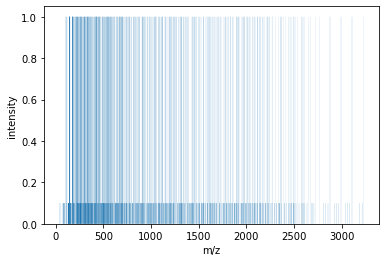

In [23]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

In [24]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Fusion_180220_40.mzML", exp)
spectra = exp.getSpectra()
observed_spectrum = spectra[0]

In [25]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(theo_spectrum, peptide, 1, 1)

40.018175498671
6934.325783934568


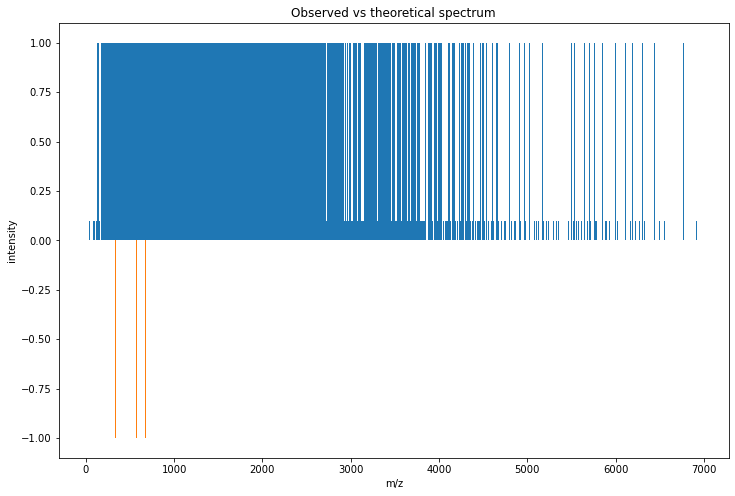

In [26]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()


print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [27]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

In [28]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))

Number of matched peaks: 12
ion	theo. m/z	observed m/z
b2+	1	115.050204658171	115.050204658171
y2+	1	207.09754991337098	207.087652785771
b3+	1	214.118618945271	214.118618945271
y3+	1	335.156128168571	335.156128168571
b4+	1	342.177197200471	342.177197200471
y4+	1	438.16531305807104	438.155415930471
b5+	1	445.18638208997106	445.186382089971
y5+	1	566.223891313271	566.2245424556709
b6+	1	573.2449603451711	573.245611487571
y6+	1	665.292305600371	665.304189742771
b7+	1	674.292639568471	674.289268710871
y7+	1	722.3137696960711	722.310398838471


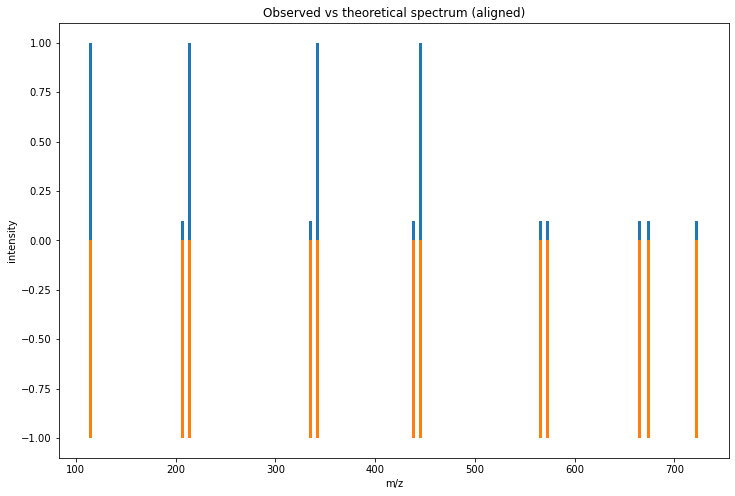

In [29]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)